In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/USER/Downloads/vending_machine_sales.csv')

In [3]:
df.head()

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022


In [4]:
to_drop =['Device ID',
        'TransDate',
        'RCoil',
        'MCoil',
        'Prcd Date']
df.drop(to_drop, inplace=True, axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       9617 non-null   object 
 1   Location     9617 non-null   object 
 2   Machine      9617 non-null   object 
 3   Product      9611 non-null   object 
 4   Category     9350 non-null   object 
 5   Transaction  9617 non-null   int64  
 6   Type         9617 non-null   object 
 7   RPrice       9617 non-null   float64
 8   RQty         9617 non-null   int64  
 9   MPrice       9614 non-null   float64
 10  MQty         9617 non-null   int64  
 11  LineTotal    9617 non-null   float64
 12  TransTotal   9617 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 976.9+ KB


In [6]:
df.isna().sum()

Status           0
Location         0
Machine          0
Product          6
Category       267
Transaction      0
Type             0
RPrice           0
RQty             0
MPrice           3
MQty             0
LineTotal        0
TransTotal       0
dtype: int64

In [7]:
Category_mode = df['Category'].mode()
Product_mode = df['Product'].mode()
Mprice_mean = df['MPrice'].mean()

print(Category_mode,
Product_mode, 
Mprice_mean)

0    Food
Name: Category, dtype: object 0    Coca Cola - Zero Sugar
Name: Product, dtype: object 1.9583940087372582


In [8]:
df['Category'] = df['Category'].fillna(df['Category'].mode()[0]) 
df['Product'] = df['Product'].fillna(df['Product'].mode()[0]) 
df['MPrice'] = df['MPrice'].fillna(df['MPrice'].mean()) 

In [9]:
df.isna().sum()

Status         0
Location       0
Machine        0
Product        0
Category       0
Transaction    0
Type           0
RPrice         0
RQty           0
MPrice         0
MQty           0
LineTotal      0
TransTotal     0
dtype: int64

In [10]:
df.describe()

,Transaction,RPrice,RQty,MPrice,MQty,LineTotal,TransTotal
count,9.617000e+03,9617.000000,9617.000000,9617.000000,9617.000000,9617.000000,9617.000000
mean,1.538223e+10,1.958251,1.014766,1.958394,1.014766,1.985520,2.220469
std,4.403263e+08,0.698608,0.127330,0.698561,0.127330,0.744244,1.084523
min,1.451578e+10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.503952e+10,1.500000,1.000000,1.500000,1.000000,1.500000,1.500000
50%,1.538346e+10,1.500000,1.000000,1.500000,1.000000,1.500000,2.000000
75%,1.573892e+10,2.500000,1.000000,2.500000,1.000000,2.500000,2.750000
max,1.617733e+10,5.000000,3.000000,5.000000,3.000000,8.000000,9.000000


In [11]:
max_Transanted_products = df.sort_values(by='MQty', ascending=False)
max_Transanted_products['Product' ].head(10)

8754                     SunChips Multigrain - Salsa
1464                  SunChips Multigrain - Original
5390                           KitKat - Crisp Wafers
1466                  SunChips Multigrain - Original
861                Cheetos Flaming Hot Limon Crunchy
7374    Snyder's of Hanover Pretzel Pieces - Cheddar
7176       Keto Bar - Creamy Peanut Butter Chocolate
455                             Poland Springs Water
6588                                       Oreo Mini
5886               Canada Dry - Ginger Ale & Lemonde
Name: Product, dtype: object

In [12]:
category = df.groupby('Category').count()

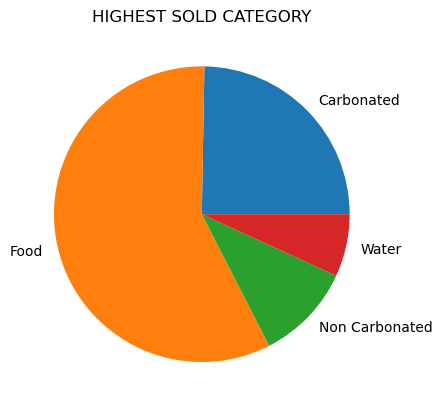

In [13]:
category = df.groupby('Category').count()
plt.pie(category['TransTotal'], labels = category.index.values)
plt.title('HIGHEST SOLD CATEGORY')
plt.show()


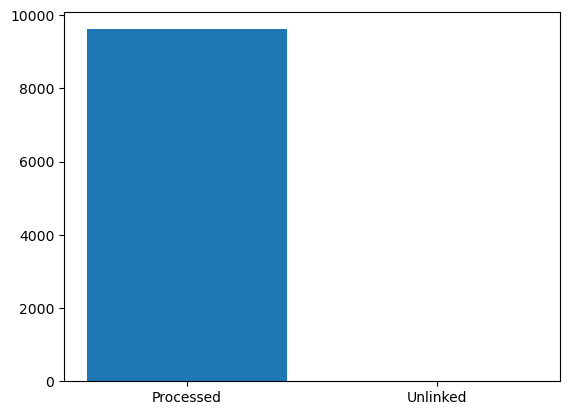

Status
Processed    9614
Unlinked        3
Name: Status, dtype: int64

In [14]:
status = df.groupby('Status').count()
plt.bar(status.index.values, status['TransTotal'])
plt.title('')
plt.show()


Status_Table = df.groupby('Status')
Status_Table['Status'].count()

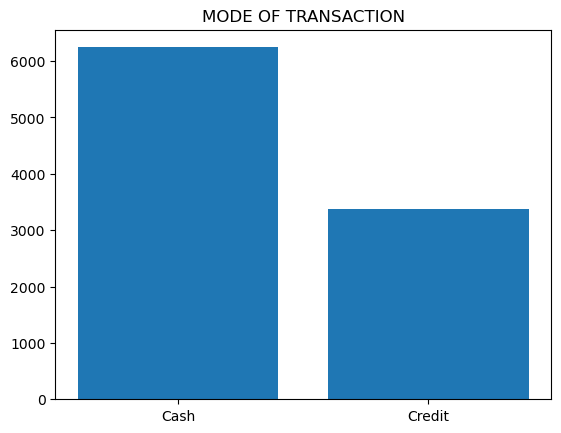

In [15]:
Type = df.groupby('Type').count()
plt.bar(Type.index.values, Type['TransTotal'])
plt.title('MODE OF TRANSACTION')
plt.show()

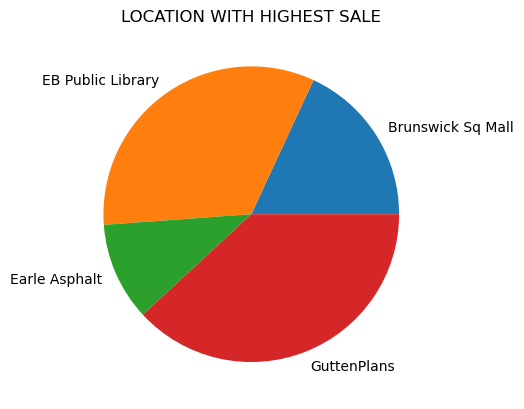

In [16]:
Location = df.groupby('Location').count()
plt.pie(Location['TransTotal'], labels = Location.index.values)
plt.title('LOCATION WITH HIGHEST SALE')
plt.show()

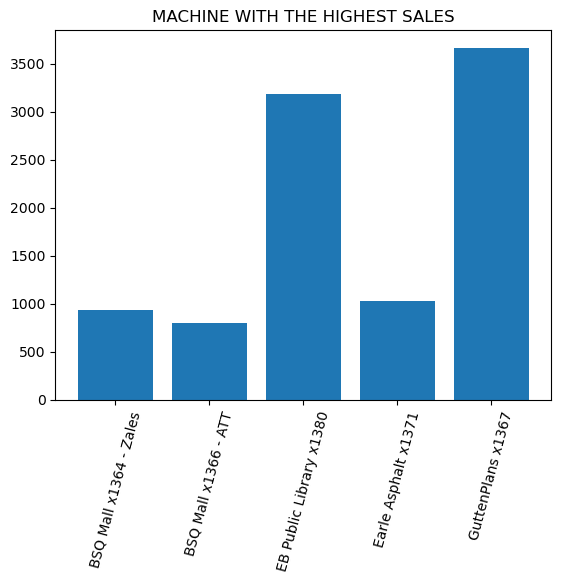

In [17]:
Machine = df.groupby('Machine').count()
plt.bar(Machine.index.values, Machine['TransTotal'])
# plt.bar(orientation='horizontal')
plt.title('MACHINE WITH THE HIGHEST SALES')
plt.xticks(rotation=75)
plt.show()